In [52]:
# Import packages
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn import metrics

In [53]:
dpc = pd.read_json("data/DPC.json").transpose()

In [54]:
dpc.drop(["all_word_counts", "barracks_status_dire", "barracks_status_radiant", "chat", "cluster", "comeback", 
          "cosmetics", "dire_score", "series_type", "skill", "stomp", "teamfights", "throw", "tower_status_dire", 
          "tower_status_radiant", "loss", "leagueid", "duration", "engine", "first_blood_time", "radiant_xp_adv", 
          "replay_url", "radiant_gold_adv", "positive_votes", "radiant_score", "negative_votes", 
          "objectives", "dire_team_id", "radiant_team_id", "human_players", "league", "lobby_type", 
          "draft_timings", "my_word_counts", "region", "replay_salt", "series_id"], axis=1, inplace=True)
dpc.drop([1], inplace=True)

In [55]:
# function that takes in range of patch number
# and returns dataframe with 1 team's picks and bans,
# and if the team won the match
def create_pick_ban_1_team(patch_range_low, patch_range_high):
    dpc_df = pd.DataFrame(columns=["pick_1", "pick_2", "pick_3", "pick_4", "pick_5",
                                 "ban_1", "ban_2", "ban_3", "ban_4", "ban_5", "ban_6",
                                 "win"])
    for i in dpc.index:
        patch = dpc.at[i, 'patch']
        game_mode = dpc.at[i, 'game_mode']
        if patch >= patch_range_low and patch <= patch_range_high and game_mode == 2: 
            length = len(dpc.at[i, 'picks_bans'])
            if  length == 22:
                ban1 = dpc.at[i, 'picks_bans'][0]["hero_id"]
                ban6 = dpc.at[i, 'picks_bans'][1]["hero_id"]
                ban2 = dpc.at[i, 'picks_bans'][2]["hero_id"]
                ban7 = dpc.at[i, 'picks_bans'][3]["hero_id"]
                ban3 = dpc.at[i, 'picks_bans'][4]["hero_id"]
                ban8 = dpc.at[i, 'picks_bans'][5]["hero_id"]

                pick1 = dpc.at[i, 'picks_bans'][6]["hero_id"]
                pick6 = dpc.at[i, 'picks_bans'][7]["hero_id"]
                pick7 = dpc.at[i, 'picks_bans'][8]["hero_id"]
                pick2 = dpc.at[i, 'picks_bans'][9]["hero_id"]

                ban9 = dpc.at[i, 'picks_bans'][10]["hero_id"]
                ban4 = dpc.at[i, 'picks_bans'][11]["hero_id"]
                ban10 = dpc.at[i, 'picks_bans'][12]["hero_id"]
                ban5 = dpc.at[i, 'picks_bans'][13]["hero_id"]

                pick8 = dpc.at[i, 'picks_bans'][14]["hero_id"]
                pick3 = dpc.at[i, 'picks_bans'][15]["hero_id"]
                pick9 = dpc.at[i, 'picks_bans'][16]["hero_id"]
                pick4 = dpc.at[i, 'picks_bans'][17]["hero_id"]  

                ban11 = dpc.at[i, 'picks_bans'][18]["hero_id"]
                ban6 = dpc.at[i, 'picks_bans'][19]["hero_id"]

                pick5 = dpc.at[i, 'picks_bans'][20]["hero_id"]
                pick10 = dpc.at[i, 'picks_bans'][21]["hero_id"] 

                firstWin = True
                secondWin = False

                team1 = pd.Series({"pick_1": pick1, "pick_2": pick2, "pick_3": pick3, "pick_4": pick4, "pick_5": pick5})
                player1_hero = dpc.at[i, "players"][0]["hero_id"]
                player1_first_pick = False
                player1_radiant = dpc.at[i, "players"][0]["isRadiant"]

                for hero in team1:
                    if hero == player1_hero:
                        player1_first_pick = True
                        # this is ran when player1's team has first pick and is radiant
                        if player1_radiant:
                            firstWin = dpc.at[i, 'radiant_win']
                            secondWin = not dpc.at[i, 'radiant_win']

                if not player1_first_pick:
                    # print(str(dpc.at[i, "players"][0]["name"]) + " has 2nd pick and is radiant")
                    secondWin = dpc.at[i, 'radiant_win']
                    firstWin = not dpc.at[i, 'radiant_win']

                dpc_df = dpc_df.append({"pick_1": pick1, 
                                         "pick_2": pick2, 
                                         "pick_3": pick3, 
                                         "pick_4": pick4, 
                                         "pick_5": pick5,
                                         "ban_1": ban1, 
                                         "ban_2": ban2, 
                                         "ban_3": ban3, 
                                         "ban_4": ban4, 
                                         "ban_5": ban5,
                                         "ban_6": ban6,
                                         "win": firstWin}, ignore_index=True)
                dpc_df = dpc_df.append({"pick_1": pick6, 
                                         "pick_2": pick7, 
                                         "pick_3": pick8, 
                                         "pick_4": pick9, 
                                         "pick_5": pick10,
                                         "ban_1": ban6, 
                                         "ban_2": ban7, 
                                         "ban_3": ban8, 
                                         "ban_4": ban9, 
                                         "ban_5": ban10,
                                         "ban_6": ban11,
                                         "win": secondWin}, ignore_index=True)
    return dpc_df

In [64]:
# major patches
# patch 7.07 to 7.09 (patch 26 to 28)
# patch 7.10 to 7.13 (patch 29 to 32)
# patch 7.14 to 7.16 (patch 33 to 36)

# has data for pick, ban, and win
patch707_single = create_pick_ban_1_team(26, 28)
patch710_single = create_pick_ban_1_team(29, 32)
patch714_single = create_pick_ban_1_team(33, 36)
patchAll_single = create_pick_ban_1_team(26, 36)

In [65]:
patch707_single

,pick_1,pick_2,pick_3,pick_4,pick_5,ban_1,ban_2,ban_3,ban_4,ban_5,ban_6,win
0,9,50,62,55,42,88,107,3,1,43,12,True
1,53,16,87,39,8,12,38,91,109,18,106,False
2,16,85,86,15,74,107,3,38,43,106,12,False
3,53,71,70,112,46,12,60,91,50,1,17,True
4,91,85,64,41,9,107,3,88,43,53,47,False
5,112,71,13,54,39,47,60,38,17,106,76,True
6,3,86,47,8,78,60,112,71,4,45,95,True
7,9,88,87,96,12,95,40,36,61,1,53,False
8,40,31,62,109,20,53,55,90,78,1,67,False
9,47,86,107,13,93,67,112,3,71,4,43,True


In [66]:
patch714_single.shape

(748, 12)

In [67]:
patchAll_single.shape

(1998, 12)

In [68]:
patch710_single.shape

(512, 12)

In [69]:
patch707_single.shape

(738, 12)

In [70]:
# function that takes in range of patch number
# and returns dataframe with radiant picks, dire picks, radiant/dire team ids,
# and if radiant won the match
def create_pick_ban_both_teams(patch_range_low, patch_range_high):
    dpc_df = pd.DataFrame(columns=["r_pick_1", "r_pick_2", "r_pick_3", "r_pick_4", "r_pick_5",
                                     "r_ban_1", "r_ban_2", "r_ban_3", "r_ban_4", "r_ban_5", "r_ban_6",
                                     "d_pick_1", "d_pick_2", "d_pick_3", "d_pick_4", "d_pick_5",
                                     "d_ban_1", "d_ban_2", "d_ban_3", "d_ban_4", "d_ban_5", "d_ban_6",
                                     "radiantWin", "radiant", "dire"])
    for i in dpc.index: 
        patch = dpc.at[i, 'patch']
        game_mode = dpc.at[i, 'game_mode']
        if patch >= patch_range_low and patch <= patch_range_high and game_mode == 2: 
            length = len(dpc.at[i, 'picks_bans'])
            if  length == 22:
                ban1 = dpc.at[i, "picks_bans"][0]["hero_id"]
                ban6 = dpc.at[i, "picks_bans"][1]["hero_id"]
                ban2 = dpc.at[i, "picks_bans"][2]["hero_id"]
                ban7 = dpc.at[i, "picks_bans"][3]["hero_id"]
                ban3 = dpc.at[i, "picks_bans"][4]["hero_id"]
                ban8 = dpc.at[i, "picks_bans"][5]["hero_id"]

                pick1 = dpc.at[i, "picks_bans"][6]["hero_id"]
                pick6 = dpc.at[i, "picks_bans"][7]["hero_id"]
                pick7 = dpc.at[i, "picks_bans"][8]["hero_id"]
                pick2 = dpc.at[i, "picks_bans"][9]["hero_id"]

                ban9 = dpc.at[i, "picks_bans"][10]["hero_id"]
                ban4 = dpc.at[i, "picks_bans"][11]["hero_id"]
                ban10 = dpc.at[i, "picks_bans"][12]["hero_id"]
                ban5 = dpc.at[i, "picks_bans"][13]["hero_id"]

                pick8 = dpc.at[i, "picks_bans"][14]["hero_id"]
                pick3 = dpc.at[i, "picks_bans"][15]["hero_id"]
                pick9 = dpc.at[i, "picks_bans"][16]["hero_id"]
                pick4 = dpc.at[i, "picks_bans"][17]["hero_id"]  

                ban11 = dpc.at[i, "picks_bans"][18]["hero_id"]
                ban6 = dpc.at[i, "picks_bans"][19]["hero_id"]

                pick5 = dpc.at[i, "picks_bans"][20]["hero_id"]
                pick10 = dpc.at[i, "picks_bans"][21]["hero_id"] 

                radiantWin = dpc.at[i, "radiant_win"]
                
                try:
                    team1_id = dpc.at[i, "radiant_team"]["team_id"]
                except TypeError:
                    continue
                team1 = pd.Series({"pick_1": pick1, "pick_2": pick2, "pick_3": pick3, "pick_4": pick4, "pick_5": pick5})
                player1_hero = dpc.at[i, "players"][0]["hero_id"]
                player1_first_pick = False
                player1_radiant = dpc.at[i, "players"][0]["isRadiant"]
                picks_bans = {}

                for hero in team1:
                    if hero == player1_hero:
                        player1_first_pick = True
                        # this is ran when player1's team has first pick and is radiant
                        if player1_radiant:
                            # print(str(dpc.at[i, "players"][0]["name"]) + " has 1st pick and is radiant")
                            picks_bans = {"r_pick_1": pick1, "r_pick_2": pick2, "r_pick_3": pick3, 
                                            "r_pick_4": pick4, "r_pick_5": pick5,
                                            "r_ban_1": ban1, "r_ban_2": ban2, "r_ban_3": ban3, 
                                            "r_ban_4": ban4, "r_ban_5": ban5, "r_ban_6": ban6,
                                            "d_pick_1": pick6, "d_pick_2": pick7, "d_pick_3": pick8, 
                                            "d_pick_4": pick9, "d_pick_5": pick10,
                                            "d_ban_1": ban6, "d_ban_2": ban7, "d_ban_3": ban8, 
                                            "d_ban_4": ban9, "d_ban_5": ban10, "d_ban_6": ban11}

                if not player1_first_pick:
                        # print(str(dpc.at[i, "players"][0]["name"]) + " has 2nd pick and is radiant")
                        picks_bans = {"r_pick_1": pick6, "r_pick_2": pick7, "r_pick_3": pick8, 
                                        "r_pick_4": pick9, "r_pick_5": pick10,
                                        "r_ban_1": ban6, "r_ban_2": ban7, "r_ban_3": ban8, 
                                        "r_ban_4": ban9, "r_ban_5": ban10, "r_ban_6": ban11,
                                        "d_pick_1": pick1, "d_pick_2": pick2, "d_pick_3": pick3, 
                                        "d_pick_4": pick4, "d_pick_5": pick5,
                                        "d_ban_1": ban1, "d_ban_2": ban2, "d_ban_3": ban3, 
                                        "d_ban_4": ban4, "d_ban_5": ban5, "d_ban_6": ban6}        

                picks_bans.update({"radiantWin": radiantWin,
                                 "radiant": radiant,
                                 "dire": dire})

                row = pd.Series(picks_bans)

                dpc_df = dpc_df.append(row, ignore_index=True)
    return dpc_df

In [72]:
# major patches
# patch 7.07 to 7.09 (patch 26 to 28)
# patch 7.10 to 7.13 (patch 29 to 32)
# patch 7.14 to 7.16 (patch 33 to 36)

# has radiant picks/bans, dire picks/bans, team_ids, radiant win(true/false)
patch707_combined = create_pick_ban_both_teams(26, 28)
patch710_combined = create_pick_ban_both_teams(29, 32)
patch714_combined = create_pick_ban_both_teams(33, 36)
patchAll_combined = create_pick_ban_both_teams(26, 36)

NameError: name 'radiant' is not defined

In [73]:
def create_picks_team(patch_range_low, patch_range_high):
    dpc_df = pd.DataFrame(columns=["pick_1", "pick_2", "pick_3", "pick_4", "pick_5",
                                 "win", "team"])
    for i in dpc.index: 
        patch = dpc.at[i, 'patch']
        game_mode = dpc.at[i, 'game_mode']
        if patch >= patch_range_low and patch <= patch_range_high and game_mode == 2: 
            length = len(dpc.at[i, 'picks_bans'])
            if  length == 22:
                pick1 = dpc.at[i, "picks_bans"][6]["hero_id"]
                pick6 = dpc.at[i, "picks_bans"][7]["hero_id"]
                pick7 = dpc.at[i, "picks_bans"][8]["hero_id"]
                pick2 = dpc.at[i, "picks_bans"][9]["hero_id"]

                pick8 = dpc.at[i, "picks_bans"][14]["hero_id"]
                pick3 = dpc.at[i, "picks_bans"][15]["hero_id"]
                pick9 = dpc.at[i, "picks_bans"][16]["hero_id"]
                pick4 = dpc.at[i, "picks_bans"][17]["hero_id"]  

                pick5 = dpc.at[i, "picks_bans"][20]["hero_id"]
                pick10 = dpc.at[i, "picks_bans"][21]["hero_id"] 

                firstWin = True
                secondWin = False
                try:
                    team1_id = dpc.at[i, "radiant_team"]["team_id"]
                except TypeError:
                    continue
                team2_id = dpc.at[i, "dire_team"]["team_id"]
                
                team1 = pd.Series({"pick_1": pick1, "pick_2": pick2, "pick_3": pick3, "pick_4": pick4, "pick_5": pick5})
                player1_hero = dpc.at[i, "players"][0]["hero_id"]
                player1_first_pick = False
                player1_radiant = dpc.at[i, "players"][0]["isRadiant"]

                for hero in team1:
                    if hero == player1_hero:
                        player1_first_pick = True
                        # this is ran when player1's team has first pick and is radiant
                        if player1_radiant:
                            firstWin = dpc.at[i, 'radiant_win']
                            secondWin = not dpc.at[i, 'radiant_win']

                if not player1_first_pick:
                    # print(str(dpc.at[i, "players"][0]["name"]) + " has 2nd pick and is radiant")
                    secondWin = dpc.at[i, 'radiant_win']
                    firstWin = not dpc.at[i, 'radiant_win']
                    team1_id = dpc.at[i, "dire_team"]["team_id"]
                    team2_id = dpc.at[i, "radiant_team"]["team_id"]

                dpc_df = dpc_df.append({"pick_1": pick1, 
                                         "pick_2": pick2, 
                                         "pick_3": pick3, 
                                         "pick_4": pick4, 
                                         "pick_5": pick5,
                                         "win": firstWin,
                                         "team": team1_id}, ignore_index=True)
                dpc_df = dpc_df.append({"pick_1": pick6, 
                                         "pick_2": pick7, 
                                         "pick_3": pick8, 
                                         "pick_4": pick9, 
                                         "pick_5": pick10,
                                         "win": secondWin,
                                         "team": team2_id}, ignore_index=True)
    return dpc_df

In [74]:
# major patches
# patch 7.07 to 7.09 (patch 26 to 28)
# patch 7.10 to 7.13 (patch 29 to 32)
# patch 7.14 to 7.16 (patch 33 to 36)

# these are data with picks, team_id, and win (true, false)
patch707_picks_team = create_picks_team(26, 28)
patch710_picks_team = create_picks_team(29, 32)
patch714_picks_team = create_picks_team(33, 36)
patchAll_picks_team = create_picks_team(26, 36)

In [75]:
patch707_picks_team

,pick_1,pick_2,pick_3,pick_4,pick_5,win,team
0,9,50,62,55,42,True,3715574
1,53,16,87,39,8,False,1375614
2,16,85,86,15,74,False,3715574
3,53,71,70,112,46,True,1375614
4,91,85,64,41,9,False,3715574
5,112,71,13,54,39,True,1375614
6,3,86,47,8,78,True,2163
7,9,88,87,96,12,False,5051649
8,40,31,62,109,20,False,5051649
9,47,86,107,13,93,True,2163


In [76]:
def create_picks(patch_range_low, patch_range_high):
    dpc_df = pd.DataFrame(columns=["pick_1", "pick_2", "pick_3", "pick_4", "pick_5",
                                 "win"])
    for i in dpc.index: 
        patch = dpc.at[i, 'patch']
        game_mode = dpc.at[i, 'game_mode']
        if patch >= patch_range_low and patch <= patch_range_high and game_mode == 2: 
            length = len(dpc.at[i, 'picks_bans'])
            if  length == 22:
                pick1 = dpc.at[i, "picks_bans"][6]["hero_id"]
                pick6 = dpc.at[i, "picks_bans"][7]["hero_id"]
                pick7 = dpc.at[i, "picks_bans"][8]["hero_id"]
                pick2 = dpc.at[i, "picks_bans"][9]["hero_id"]

                pick8 = dpc.at[i, "picks_bans"][14]["hero_id"]
                pick3 = dpc.at[i, "picks_bans"][15]["hero_id"]
                pick9 = dpc.at[i, "picks_bans"][16]["hero_id"]
                pick4 = dpc.at[i, "picks_bans"][17]["hero_id"]  

                pick5 = dpc.at[i, "picks_bans"][20]["hero_id"]
                pick10 = dpc.at[i, "picks_bans"][21]["hero_id"] 

                firstWin = True
                secondWin = False

                team1 = pd.Series({"pick_1": pick1, "pick_2": pick2, "pick_3": pick3, "pick_4": pick4, "pick_5": pick5})
                player1_hero = dpc.at[i, "players"][0]["hero_id"]
                player1_first_pick = False
                player1_radiant = dpc.at[i, "players"][0]["isRadiant"]

                for hero in team1:
                    if hero == player1_hero:
                        player1_first_pick = True
                        # this is ran when player1's team has first pick and is radiant
                        if player1_radiant:
                            firstWin = dpc.at[i, 'radiant_win']
                            secondWin = not dpc.at[i, 'radiant_win']

                if not player1_first_pick:
                    # print(str(dpc.at[i, "players"][0]["name"]) + " has 2nd pick and is radiant")
                    secondWin = dpc.at[i, 'radiant_win']
                    firstWin = not dpc.at[i, 'radiant_win']

                dpc_df = dpc_df.append({"pick_1": pick1, 
                                         "pick_2": pick2, 
                                         "pick_3": pick3, 
                                         "pick_4": pick4, 
                                         "pick_5": pick5,
                                         "win": firstWin}, ignore_index=True)
                dpc_df = dpc_df.append({"pick_1": pick6, 
                                         "pick_2": pick7, 
                                         "pick_3": pick8, 
                                         "pick_4": pick9, 
                                         "pick_5": pick10,
                                         "win": secondWin}, ignore_index=True)
    return dpc_df

In [77]:
# major patches
# patch 7.07 to 7.09 (patch 26 to 28)
# patch 7.10 to 7.13 (patch 29 to 32)
# patch 7.14 to 7.16 (patch 33 to 36)

# these are data with only picks and win (true,false)
patch707_picks = create_picks(26, 28)
patch710_picks = create_picks(29, 32)
patch714_picks = create_picks(33, 36)
patchAll_picks = create_picks(26, 36)

In [78]:
patch707_picks

,pick_1,pick_2,pick_3,pick_4,pick_5,win
0,9,50,62,55,42,True
1,53,16,87,39,8,False
2,16,85,86,15,74,False
3,53,71,70,112,46,True
4,91,85,64,41,9,False
5,112,71,13,54,39,True
6,3,86,47,8,78,True
7,9,88,87,96,12,False
8,40,31,62,109,20,False
9,47,86,107,13,93,True


Now that we have defined what are major patches are and split our data correctly we need to explore some other variables. We will now explore the effects bans and team have on winning. In DotA at the begining of every game teams not only take turns picking characters they also have the opportunity to ban characters meaning neither team can use the character. So here we will first explore if bans have a correlation to winning, do bans in fact matter for our final model? We will then explore if there are "dominant" teams, being able to predict who will win a match should be affected by the skill of the players. Or perhaps there is a lot of parody and including teams would be a detriment to the model. Another thing we can also test is if certain picks are more important than others, as in does the first or last pick have a stronger correlation to winning?


Since this dataset is a set of matches from professional DotA we will be conducting this analysis under this assumption that there are no explicitly "bad" bans and every decision made is an educated one. 

In [79]:
import seaborn as sns
#first heat map of correlations of everything (all data), picks, bans, win, team. 

In [80]:

#Correlation heat charts. 
#All of the columns
#patch 1
#For each patch, split correlation heat maps picks win and team, without team, with bans no team and with bans and team.

#First patch 707, heat map of picks, bans, win and team




In [ ]:
#checking to see if any team dominated 

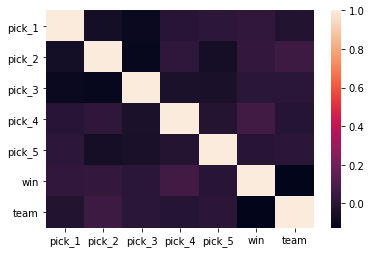

In [81]:
#heat map with out bans, does anything change?

sns.heatmap(patch707_picks_team.astype(int).corr())

In [ ]:
#Heat map with bans and picks but no teams

In [ ]:
#heat map with just picks

What we see from this heat map

In [ ]:
#patch number 2
sns.heatmap(df.corr()**2)

In [26]:
#patch 3
sns.heatmap(df.corr()**2)

NameError: name 'sns' is not defined

What we see from these heat maps. 